**This code is to establish linearity among different parameters and maize production**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

**Reading the data**

In [4]:
df = pd.read_excel('5_parameters_data.xlsx')

In [6]:
df

,District,Rice_Production_223,NetAreaIrrigated_Tanks_NetAreaIrrigated_176,NetAreaIrrigatedUnderDifferentSources_LiftIrrigation_No_183,NetAreaIrrigatedUnderDifferentSources_LiftIrrigation_NetIrrigatedArea_185,AreaUnderCereals_Paddy_190,TotalNPK_315
0,BENGALURU,3376,164,0,0,782,23310
1,BENGALURU(R),2354,0,1,35,736,19259
2,RAMANAGARA,12128,1688,4,425,4468,7472
3,CHITRADURGA,4566,0,107,0,1297,35884
4,DAVANAGERE,489505,1534,1562,6610,98259,99644
5,KOLAR,864,0,0,0,395,22190
6,CHIKKABALLAPURA,2698,0,21,0,1333,28357
7,SHIVAMOGGA,384974,50951,4152,3848,109617,56609
8,TUMAKURU,26042,8998,9,0,10379,38148
9,CHIKKAMAGALURU,110533,6384,4075,110,33036,67863


The five concepts involved in establishing linearity are:
1. Linear relationship: There exists a linear relationship between each predictor variable and the response variable.

2. No Multicollinearity: None of the predictor variables are highly correlated with each other.

3. Independence: The observations are independent.

4. Homoscedasticity: The residuals have constant variance at every point in the linear model.

5. Multivariate Normality: The residuals of the model are normally distributed.

**For Linear Relationship**

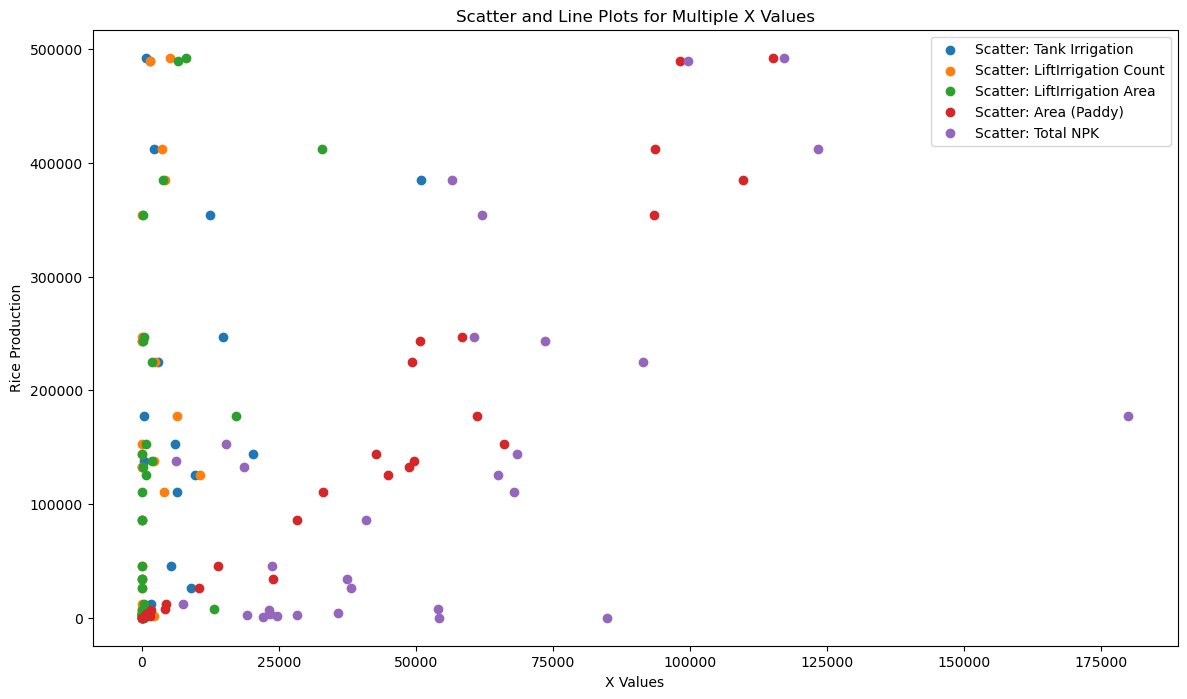

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

parameters = ['Rice Production', 'Tank Irrigation',
              'LiftIrrigation Count', 'LiftIrrigation Area', 
              'Area (Paddy)','Total NPK']

df_values = df.drop('District', axis = 1)
df_values

for parameter, column_name in zip(parameters, df_values.columns):
    df_values.rename(columns = {column_name: parameter}, inplace = True )
df_values  

parameters = ['Tank Irrigation',
              'LiftIrrigation Count', 'LiftIrrigation Area', 
              'Area (Paddy)','Total NPK']

# List of x columns
x_columns = parameters
y_column = 'Rice Production'

# Create a plot
plt.figure(figsize=(14, 8))

# Plot scatter and line for each x column
for x in x_columns:
    plt.scatter(df_values[x], df_values[y_column], label=f'Scatter: {x}')

# Adding title and labels
plt.title('Scatter and Line Plots for Multiple X Values')
plt.xlabel('X Values')
plt.ylabel('Rice Production')

# Adding legend
plt.legend()

# Show the plot
plt.show()


**This does not help in giving a clear picture, hence for each individual parameter**

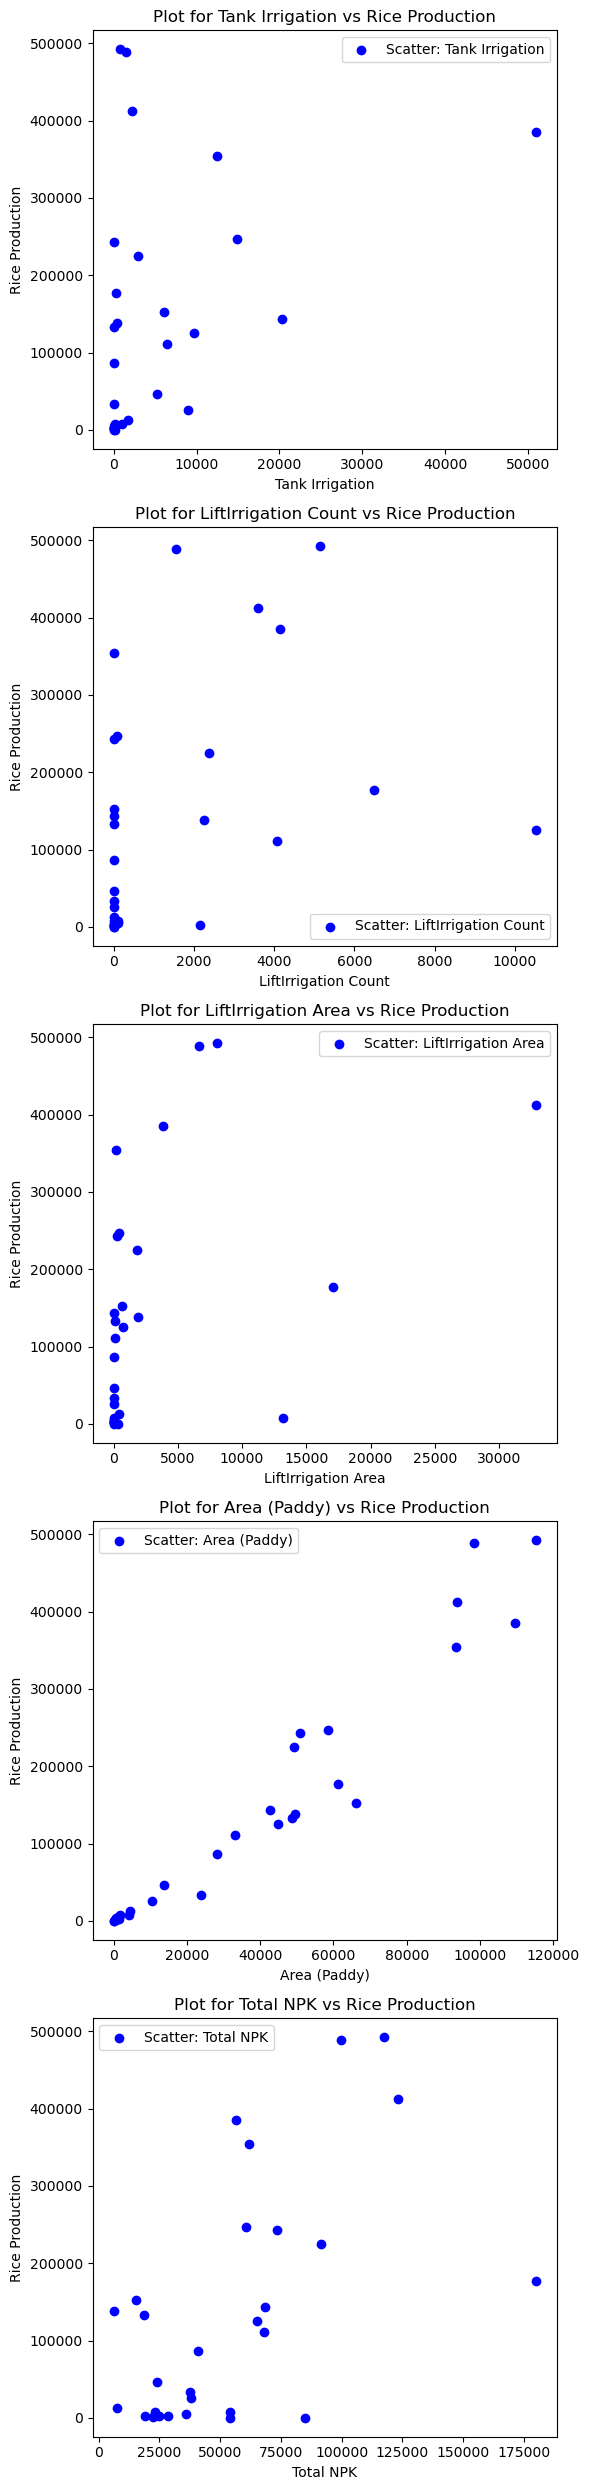

In [10]:
n = len(x_columns)

# Create subplots
fig, axs = plt.subplots(n, 1, figsize=(6, 5 * n))

# Plot each x column
for i, x in enumerate(x_columns):
    axs[i].scatter(df_values[x], df_values[y_column], label=f'Scatter: {x}', color='b')
    axs[i].set_title(f'Plot for {x} vs {y_column}')
    axs[i].set_xlabel(x)
    #axs[i].set_xlim([0, 1000])
    axs[i].set_ylabel(y_column)
    axs[i].legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

**There is a clear spread even though there is some linearity in the plot found above**

**No Multicollinearity**

In [11]:
corr = df_values.drop('Rice Production', axis=1).corr(method='pearson')
#.drop('residuals', axis = 1).drop('predicted', axis=1).
#.drop('Irrigated by Wells', axis=1).drop('LiftIrrigation', axis=1).drop('Area (Maize)', axis=1)
#.drop('Irrigated by TubeWells', axis = 1).drop('Irrigated by Wells', axis=1).drop('Area (Maize)', axis=1).drop('Total Loan', axis=1)
corr[ corr > 0.9 ] = 0
corr

,Tank Irrigation,LiftIrrigation Count,LiftIrrigation Area,Area (Paddy),Total NPK
Tank Irrigation,0.000000,0.213199,-0.049435,0.455621,0.050510
LiftIrrigation Count,0.213199,0.000000,0.371100,0.447792,0.543843
LiftIrrigation Area,-0.049435,0.371100,0.000000,0.431666,0.651774
Area (Paddy),0.455621,0.447792,0.431666,0.000000,0.551607
Total NPK,0.050510,0.543843,0.651774,0.551607,0.000000


In [12]:
import statsmodels.api as sm
features = df_values.drop('Rice Production', axis = 1)
actual_values = df_values['Rice Production']
train_features = sm.add_constant(features)

In [14]:
model = sm.OLS(actual_values, train_features).fit()
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data['Variable'] = X.columns
    vif_data['ViF'] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
    return vif_data

vif_df1 = calculate_vif(features)
                        #.drop('Irrigated by TubeWells', axis = 1).drop('Irrigated by Wells', axis=1).drop('Area (Maize)', axis=1).drop('Total Loan', axis=1))

print(vif_df1)

               Variable       ViF
0       Tank Irrigation  1.766089
1  LiftIrrigation Count  1.964956
2   LiftIrrigation Area  1.948150
3          Area (Paddy)  4.115364
4             Total NPK  4.012632


Here this is a major issue, as the ViF values are comparably high, and this is the only criterion that is violated in this scenario.

In [15]:
tolerance = pd.DataFrame()
tolerance['tolerance value'] = [ 1 / value for value in vif_df1['ViF'] ]
tolerance['Variable'] = vif_df1['Variable']
tolerance

,tolerance value,Variable
0,0.566223,Tank Irrigation
1,0.508917,LiftIrrigation Count
2,0.513307,LiftIrrigation Area
3,0.242992,Area (Paddy)
4,0.249213,Total NPK


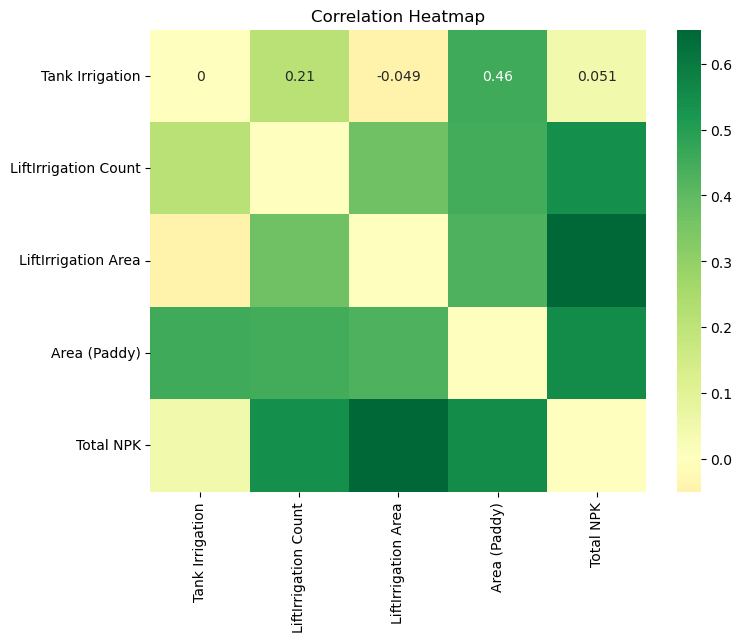

In [16]:
import seaborn as sns
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(corr, annot=True, cmap='RdYlGn', center=0)
#plt.xticks(rotation=45, ha='right', fontsize=12)
#plt.yticks(rotation=0, fontsize=12)
heatmap.set_title('Correlation Heatmap')
plt.show()

**There is less correlation between different components, and the ViF values are also less**

**Homoscedasticity**

This means that in linear regression, if the residuals follow a model that has a constant variance, then it follows homoscedasticity

In [17]:
import numpy as np
import pandas as pd

# Assuming train_features is your DataFrame and actual_values is your Series
X = train_features.values
y = actual_values.values

# Compute the coefficients using the normal equation
X_transpose_X = np.dot(X.T, X)
X_transpose_y = np.dot(X.T, y)
coefficients = np.linalg.solve(X_transpose_X, X_transpose_y)

# Predicted values
predicted_values = np.dot(X, coefficients)

# Create a pandas Series for predicted values
predicted_values = pd.Series(predicted_values, index=train_features.index)
print(predicted_values)

0     -13550.252579
1     -15518.510668
2      -7325.664434
3      -6037.332753
4     408348.961662
5     -15517.039869
6      -8918.243719
7     377508.833319
8      25095.951427
9     108841.229015
10    179318.425262
11    163172.157244
12    161931.153733
13    106921.236364
14    226111.415198
15    371950.356558
16     35701.532213
17    266119.728034
18     -1822.523917
19     12288.571597
20     87363.159562
21     -9892.594296
22    114117.638926
23    243753.233089
24    386822.321921
25    -22722.282635
26     12886.030688
27    199424.072599
28    464572.961500
29    213591.474958
dtype: float64


Variance of Residuals: 1229005309.3019252


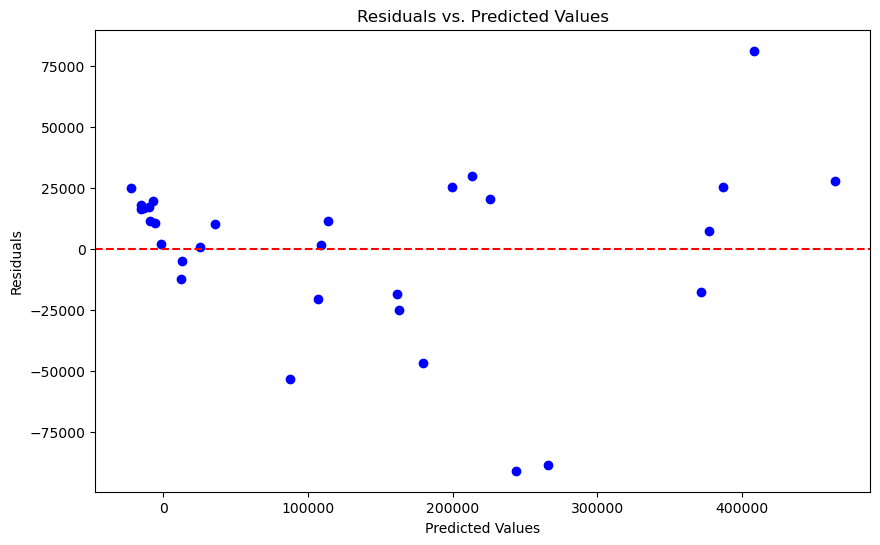

Breusch-Pagan Test
LM Statistic: 4.779815657723287, p-value: 0.028795203042675216


In [18]:
df_values['residuals'] = actual_values - predicted_values 
df_values['predicted'] = predicted_values
# Compute the variance of residuals
variance_residuals = np.var(df_values['residuals'], ddof=1)  # ddof=1 for sample variance

print("Variance of Residuals:", variance_residuals)

# Plot Residuals vs. Predicted Values to check for homoscedasticity
plt.figure(figsize=(10, 6))
plt.scatter(predicted_values, df_values['residuals'], color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()

# Optional: Breusch-Pagan test for homoscedasticity
# Adding a constant to the model
X = sm.add_constant(df_values['predicted'])
results = sm.OLS(df_values['residuals'], X).fit()
test_results = sm.stats.diagnostic.het_breuschpagan(results.resid, X)

print("Breusch-Pagan Test")
print(f"LM Statistic: {test_results[0]}, p-value: {test_results[1]}")


**From this test we find the p-values is less that 0.05, which does not satisfy Homoscedasticity**

**Multivariate Normality**

D:\Users\acer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


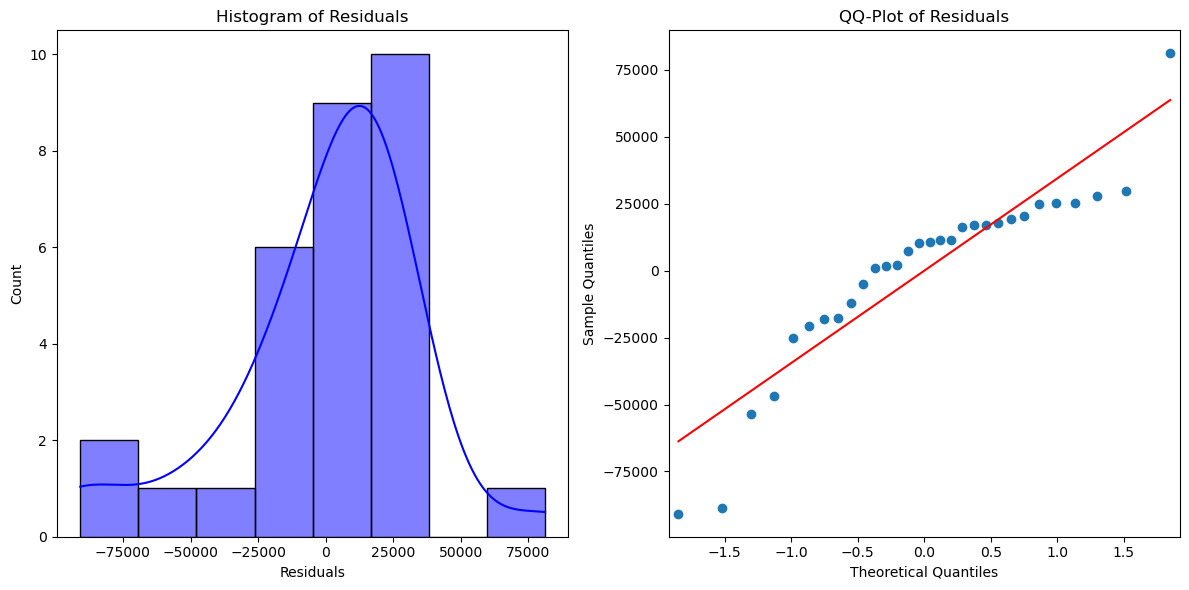

Shapiro-Wilk Test
Statistic: 0.8854649662971497, p-value: 0.0037731092888861895
Skewness: -0.911384459294025, Kurtosis: 1.9931547171992086
Jarque-Bera Test
Statistic: 6.490065764294208, p-value: 0.0389672830082865


In [19]:
import scipy.stats as stats
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.stattools import jarque_bera

# 1. Histogram and QQ-Plot for residuals
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df_values['residuals'], kde=True, color='blue')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')

# QQ-Plot
plt.subplot(1, 2, 2)
qqplot(df_values['residuals'], line='s', ax=plt.gca())
plt.title('QQ-Plot of Residuals')

plt.tight_layout()
plt.show()

# 2. Shapiro-Wilk Test
shapiro_test = stats.shapiro(df_values['residuals'])
print("Shapiro-Wilk Test")
print(f"Statistic: {shapiro_test.statistic}, p-value: {shapiro_test.pvalue}")

# 3. Skewness and Kurtosis
skewness = df_values['residuals'].skew()
kurtosis = df_values['residuals'].kurtosis()
print(f'Skewness: {skewness}, Kurtosis: {kurtosis}')

# 4. Jarque-Bera Test
jb_test = jarque_bera(df_values['residuals'])
print("Jarque-Bera Test")
print(f"Statistic: {jb_test[0]}, p-value: {jb_test[1]}")

**Again we can see that it passes both Shapiro-Wilk test, as p-value is less than 0.05, it does not satisfy this test**